In [1]:
import numpy as np
import pandas as pd
import itertools
from random import randint

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, r2_score, classification_report, roc_auc_score, roc_curve, auc

In [2]:
df = pd.read_csv('crx.data', names=['dct1', 'ctus1', 'ctus2', 'dct2', 'dct3', 'dct4', 'dct5', 'ctus3',
                                     'dct6', 'dct7', 'ctus4', 'dct8', 'dct9', 'ctus5', 'ctus6', 'target'])
df.head()

,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
df.describe(include='all')

,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6,target
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
dct1      690 non-null object
ctus1     690 non-null object
ctus2     690 non-null float64
dct2      690 non-null object
dct3      690 non-null object
dct4      690 non-null object
dct5      690 non-null object
ctus3     690 non-null float64
dct6      690 non-null object
dct7      690 non-null object
ctus4     690 non-null int64
dct8      690 non-null object
dct9      690 non-null object
ctus5     690 non-null object
ctus6     690 non-null int64
target    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [5]:
df.loc[df['ctus1']=='?', 'ctus1']='NaN'
df.loc[df['ctus5']=='?', 'ctus5']='NaN'
df.loc[df['dct1']=='?', 'dct1']=' '
df.loc[df['dct2']=='?', 'dct2']=' '
df.loc[df['dct3']=='?', 'dct3']=' '
df.loc[df['dct4']=='?', 'dct4']=' '
df.loc[df['dct5']=='?', 'dct5']=' '

In [6]:
df['ctus1'] = df['ctus1'].astype('float64')
df['ctus5'] = df['ctus5'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
dct1      690 non-null object
ctus1     678 non-null float64
ctus2     690 non-null float64
dct2      690 non-null object
dct3      690 non-null object
dct4      690 non-null object
dct5      690 non-null object
ctus3     690 non-null float64
dct6      690 non-null object
dct7      690 non-null object
ctus4     690 non-null int64
dct8      690 non-null object
dct9      690 non-null object
ctus5     677 non-null float64
ctus6     690 non-null int64
target    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


In [7]:
df.corr()

,ctus1,ctus2,ctus3,ctus4,ctus5,ctus6
ctus1,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
ctus2,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
ctus3,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
ctus4,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
ctus5,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
ctus6,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


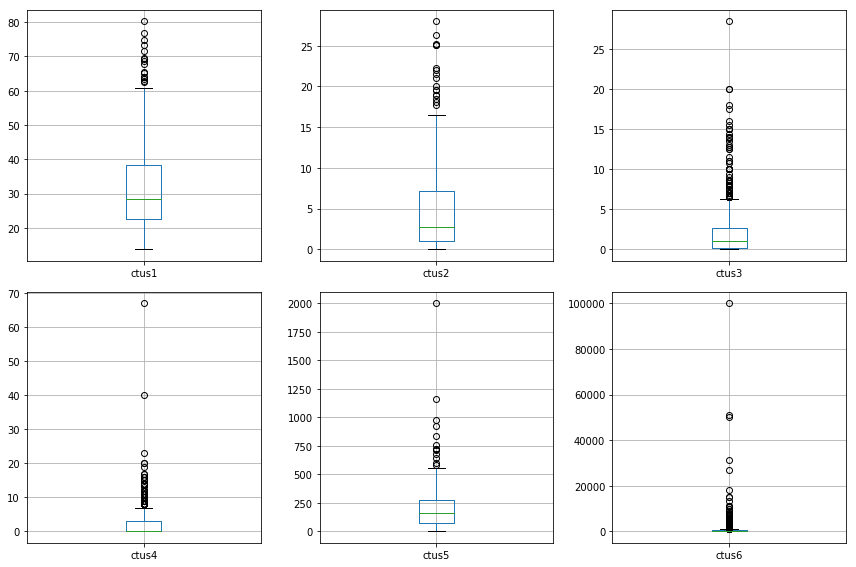

In [8]:
plotdata = df.select_dtypes(['float64', 'int64'])

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for ind, data in enumerate(list(plotdata.columns.values)[:]):
    a = plotdata.boxplot(data, ax=axes.flatten()[ind])

plt.tight_layout() 

plt.show()

In [61]:
y = df['target'].apply(lambda x: 1 if x=='+' else 0)
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify=y)

In [10]:
print(f"The total number of rows with missing values in the training set is {X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)].shape[0]}.\n")
X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)]

The total number of rows with missing values in the training set is 29.



,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6
374,,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,260.0,1004
598,,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,240.0,768
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,NaN,0
489,,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,263.0,0
515,b,NaN,10.500,u,g,x,v,6.500,t,f,0,f,g,0.0,0
248,,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,73.0,444
673,,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,256.0,17
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,NaN,600
601,,42.25,1.750,y,p,,,0.000,f,f,0,t,g,150.0,1


In [11]:
print(f"The total number of rows with missing values in the test set is {X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)].shape[0]}.\n")
X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)]

The total number of rows with missing values in the test set is 8.



,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0,t,s,320.0,0
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,NaN,0
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0,t,g,411.0,0
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0,f,g,380.0,2010
592,b,23.17,0.000,,,,,0.000,f,f,0,f,p,NaN,0
327,,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,1160.0,0
479,,26.50,2.710,y,p,,,0.085,f,f,0,f,s,80.0,0
270,b,37.58,0.000,,,,,0.000,f,f,0,f,p,NaN,0


In [10]:
experiment_df = pd.DataFrame(columns=['classifier_type', 'num_row_missing_train', 'num_row_missing_test', 'percent_missing_train', 'percent_missing_test', 'accuracy', 'precision', 'recall', 'f1-score', 'auc'])

In [13]:
# adapted from https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.drop('target', axis=1).select_dtypes(['float64', 'int64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', QuantileTransformer())])

categorical_features = df.drop('target', axis=1).select_dtypes('object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs', random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

In [11]:
def display_matrix(actual_y, prediction_y, data='Training Set', method='Classifier'):
    
    """
    create an confusion matrix plot given the actual and predicted values of the target
    and prints the classification report.
    """
    
    cf = confusion_matrix(actual_y, prediction_y)
    
    if data == 'Training Set':
        plt.imshow(cf, cmap=plt.cm.Purples)
    else:
        plt.imshow(cf, cmap=plt.cm.Greens)
    
    plt.title(f'Confusion Matrix for {data}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    class_names = set(y)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    thresh = cf.max() / 2.

    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
            plt.text(j, i, cf[i, j],
                 horizontalalignment="center",
                 color="white" if cf[i, j] > thresh else "black")

    
    plt.colorbar()

    print(f'Classification Report for {data}:\n')
    print(classification_report(actual_y, prediction_y))
    print("{} Accuracy for {}: {:.4}%".format(data, method, accuracy_score(actual_y, prediction_y) * 100))

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       306
           1       0.83      0.88      0.86       246

   micro avg       0.87      0.87      0.87       552
   macro avg       0.87      0.87      0.87       552
weighted avg       0.87      0.87      0.87       552

Training Set Accuracy for Logistic Regression: 86.78%


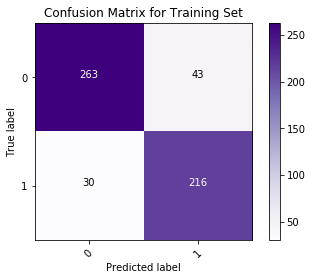

In [15]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Logistic Regression')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.91      0.88      0.89        77
           1       0.86      0.89      0.87        61

   micro avg       0.88      0.88      0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138

Test Set Accuracy for Logistic Regression: 88.41%


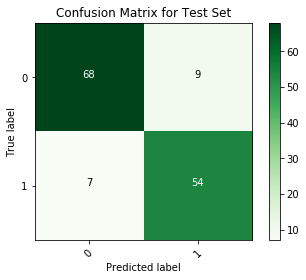

In [16]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Logistic Regression')

In [12]:
def roc_graph(actual_y, prediction_y):
    
    """
    create a ROC curve given the actual and predicted values of the target
    """
    
    fpr, tpr, threshold = roc_curve(actual_y, prediction_y)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

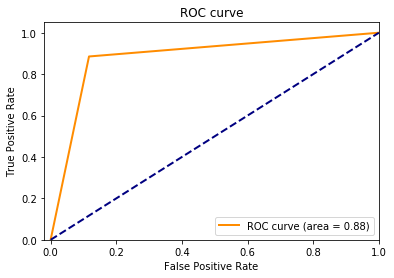

In [18]:
roc_graph(y_test, y_hat_test)

In [13]:
def update_table(df, clf):
    classifier = str(clf.steps[1][1]).split('(')[0]
    num_m_train = X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)].shape[0]
    num_m_test = X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)].shape[0]
    pct_m_train = round(((((X_train.loc[X_train.any(axis=1)]==' ').sum(axis=1) + X_train.isna().sum(axis=1)).mean()/X_train.shape[1])*100), 2)
    pct_m_test = round(((((X_test.loc[X_test.any(axis=1)]==' ').sum(axis=1) + X_test.isna().sum(axis=1)).mean()/X_test.shape[1])*100), 2)
    accuracy = accuracy_score(y_test, y_hat_test).round(2)
    precision = precision_score(y_test, y_hat_test).round(2)
    recall = recall_score(y_test, y_hat_test).round(2)
    f1 = f1_score(y_test, y_hat_test).round(2)
    fpr, tpr, _ = roc_curve(y_test, y_hat_test)
    roc_auc = auc(fpr, tpr).round(2)
    
    df = df.append({'classifier_type' : classifier , 'num_row_missing_train' : num_m_train,
                    'num_row_missing_test' : num_m_test, 'percent_missing_train' : pct_m_train, 
                    'percent_missing_test' : pct_m_test, 'accuracy' : accuracy, 'precision' : precision, 
                    'recall' : recall, 'f1-score' : f1, 'auc' : roc_auc}, ignore_index=True)
    
    return df

In [20]:
experiment_df = update_table(experiment_df, clf)
experiment_df

,classifier_type,num_row_missing_train,num_row_missing_test,percent_missing_train,percent_missing_test,accuracy,precision,recall,f1-score,auc
0,LogisticRegression,29,8,0.59,0.87,0.88,0.86,0.89,0.87,0.88


In [21]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.drop('target', axis=1).select_dtypes(['float64', 'int64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999999999)),
    ('scaler', QuantileTransformer())])

categorical_features = df.drop('target', axis=1).select_dtypes('object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', ExtraTreesClassifier(n_estimators=250, random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       246

   micro avg       1.00      1.00      1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

Training Set Accuracy for Extra Trees Classifier: 100.0%


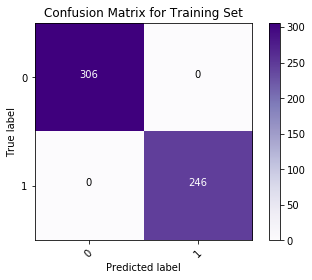

In [22]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Extra Trees Classifier')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.85      0.82      0.83        61

   micro avg       0.86      0.86      0.86       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.86      0.85       138

Test Set Accuracy for Extra Trees Classifier: 85.51%


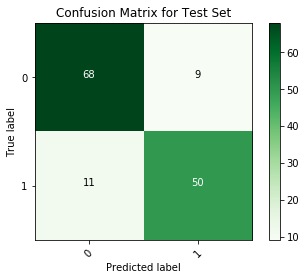

In [23]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Extra Trees Classifier')

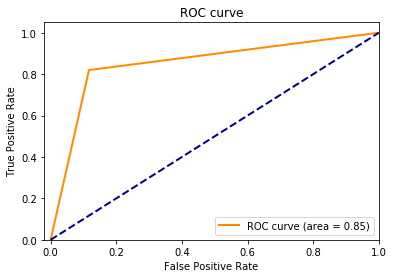

In [24]:
roc_graph(y_test, y_hat_test)

In [25]:
experiment_df = update_table(experiment_df, clf)

In [26]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=250, random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       246

   micro avg       1.00      1.00      1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

Training Set Accuracy for Random Forest Classifier: 100.0%


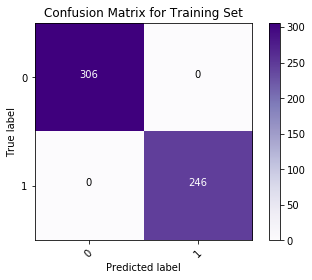

In [27]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Random Forest Classifier')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        77
           1       0.88      0.84      0.86        61

   micro avg       0.88      0.88      0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

Test Set Accuracy for Random Forest Classifier: 87.68%


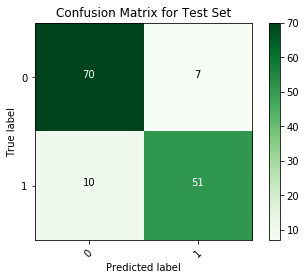

In [28]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Random Forest Classifier')

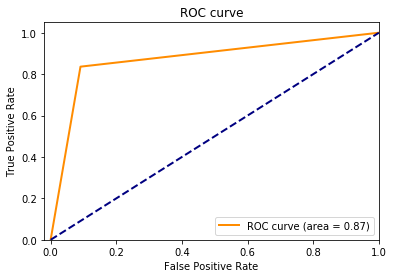

In [29]:
roc_graph(y_test, y_hat_test)

In [30]:
experiment_df = update_table(experiment_df, clf)

In [31]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', AdaBoostClassifier(n_estimators=250, random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       306
           1       0.95      0.94      0.95       246

   micro avg       0.95      0.95      0.95       552
   macro avg       0.95      0.95      0.95       552
weighted avg       0.95      0.95      0.95       552

Training Set Accuracy for AdaBoost Classifier: 95.47%


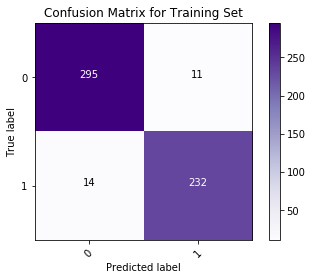

In [32]:
display_matrix(y_train, y_hat_train, data='Training Set', method='AdaBoost Classifier')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        77
           1       0.87      0.85      0.86        61

   micro avg       0.88      0.88      0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138

Test Set Accuracy for AdaBoost Classifier: 87.68%


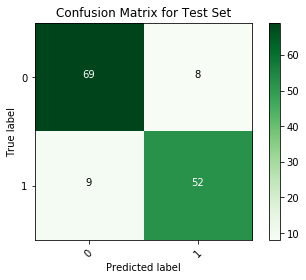

In [33]:
display_matrix(y_test, y_hat_test, data='Test Set', method='AdaBoost Classifier')

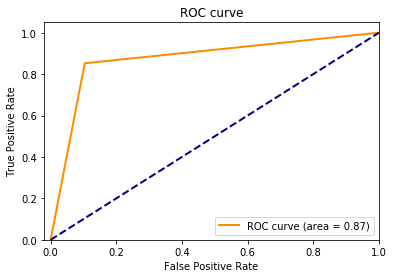

In [34]:
roc_graph(y_test, y_hat_test)

In [35]:
experiment_df = update_table(experiment_df, clf)

In [36]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(n_estimators=250, random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       246

   micro avg       1.00      1.00      1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552

Training Set Accuracy for Gradient Boosting Classifier: 99.82%


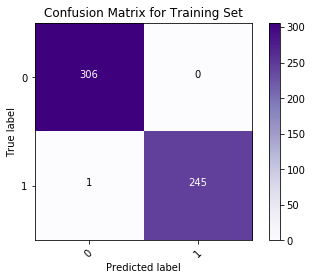

In [37]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Gradient Boosting Classifier')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        77
           1       0.87      0.89      0.88        61

   micro avg       0.89      0.89      0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138

Test Set Accuracy for Gradient Boosting Classifier: 89.13%


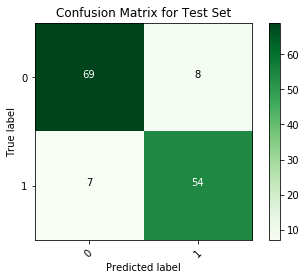

In [38]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Gradient Boosting Classifier')

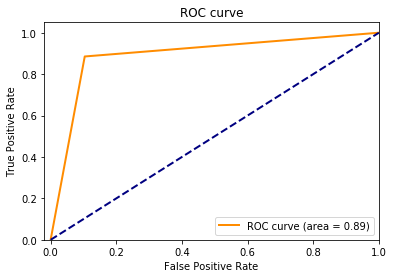

In [39]:
roc_graph(y_test, y_hat_test)

In [40]:
experiment_df = update_table(experiment_df, clf)

In [41]:
def missing_data_doubler(data, target_num=None):
    if target_num==None:
        target_num = (data.loc[((data==' ').any(axis=1)) | (data.isna().any(axis=1))].shape[0])*2
        
    data['ctus4'] = data['ctus4'].astype('float64')
    data['ctus6'] = data['ctus6'].astype('float64')
    
    rows, columns = np.array(data.shape)-1
    column_names = data.columns.tolist()
    while len(data.loc[((data==' ').any(axis=1)) | (data.isna().any(axis=1))].index.tolist()) < target_num:
        row_ind, col_ind = randint(0,rows), randint(0,columns)
        if data.iloc[:, col_ind].dtypes == 'object':
            data.iat[row_ind, col_ind] = ' '
        else:
            data.iat[row_ind, col_ind] = 'NaN'
            
    return data

In [42]:
X_train.shape

(552, 15)

In [160]:
X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)].shape[0]

414

In [161]:
X_train = missing_data_doubler(X_train, target_num=552)
X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)].shape[0]

/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


552

In [45]:
X_test.shape

(138, 15)

In [162]:
X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)].shape[0]

104

In [163]:
X_test = missing_data_doubler(X_test, target_num=138)
X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)].shape[0]

/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


138

In [373]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.drop('target', axis=1).select_dtypes(['float64', 'int64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', QuantileTransformer())])

categorical_features = df.drop('target', axis=1).select_dtypes('object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs', random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       306
           1       0.80      0.74      0.77       246

   micro avg       0.80      0.80      0.80       552
   macro avg       0.80      0.79      0.80       552
weighted avg       0.80      0.80      0.80       552

Training Set Accuracy for Logistic Regression: 80.07%


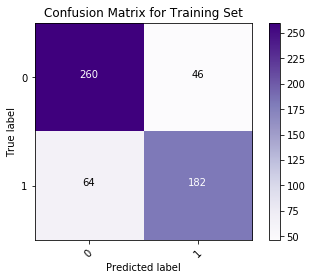

In [374]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Logistic Regression')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.83      0.72      0.77        61

   micro avg       0.81      0.81      0.81       138
   macro avg       0.82      0.80      0.81       138
weighted avg       0.81      0.81      0.81       138

Test Set Accuracy for Logistic Regression: 81.16%


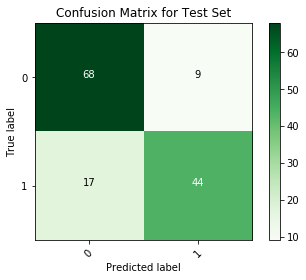

In [375]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Logistic Regression')

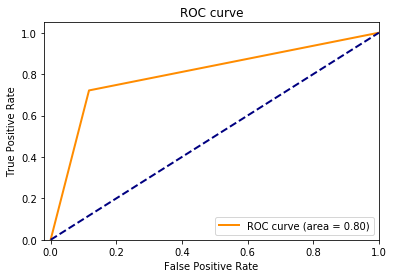

In [376]:
roc_graph(y_test, y_hat_test)

In [377]:
experiment_df = update_table(experiment_df, clf)
experiment_df

,classifier_type,num_row_missing_train,num_row_missing_test,percent_missing_train,percent_missing_test,accuracy,precision,recall,f1-score,auc
0,LogisticRegression,414,104,5.24,5.51,0.87,0.84,0.87,0.85,0.87
1,ExtraTreesClassifier,414,104,5.24,5.51,0.86,0.84,0.84,0.84,0.85
2,RandomForestClassifier,414,104,5.24,5.51,0.86,0.84,0.85,0.85,0.86
3,AdaBoostClassifier,414,104,5.24,5.51,0.85,0.82,0.84,0.83,0.85
4,GradientBoostingClassifier,414,104,5.24,5.51,0.83,0.84,0.77,0.80,0.83
5,LogisticRegression,414,104,10.00,10.00,0.88,0.85,0.87,0.86,0.88
6,ExtraTreesClassifier,414,104,10.00,10.00,0.86,0.84,0.84,0.84,0.85
7,RandomForestClassifier,414,104,10.00,10.00,0.86,0.84,0.85,0.85,0.86
8,AdaBoostClassifier,414,104,10.00,10.00,0.83,0.81,0.82,0.81,0.83
9,GradientBoostingClassifier,414,104,10.00,10.00,0.86,0.86,0.80,0.83,0.85


In [393]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = df.drop('target', axis=1).select_dtypes(['float64', 'int64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-999999999)),
    ('scaler', QuantileTransformer())])

categorical_features = df.drop('target', axis=1).select_dtypes('object').columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(n_estimators=250, random_state=10))])

clf.fit(X_train, y_train)

y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       306
           1       0.99      0.93      0.96       246

   micro avg       0.97      0.97      0.97       552
   macro avg       0.97      0.96      0.97       552
weighted avg       0.97      0.97      0.97       552

Training Set Accuracy for Extra Trees Classifier: 96.74%


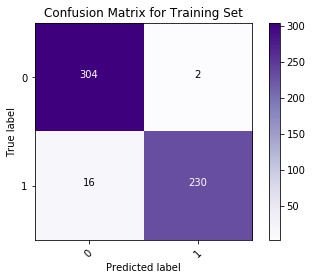

In [394]:
display_matrix(y_train, y_hat_train, data='Training Set', method='Extra Trees Classifier')

Classification Report for Test Set:

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.77      0.72      0.75        61

   micro avg       0.78      0.78      0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138

Test Set Accuracy for Extra Trees Classifier: 78.26%


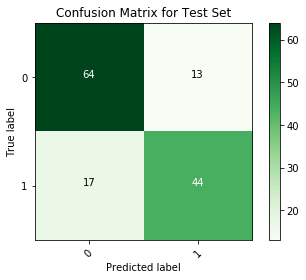

In [395]:
display_matrix(y_test, y_hat_test, data='Test Set', method='Extra Trees Classifier')

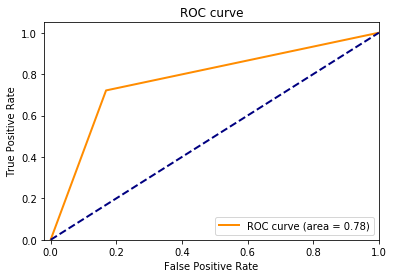

In [396]:
roc_graph(y_test, y_hat_test)

In [397]:
experiment_df = update_table(experiment_df, clf)
experiment_df

,classifier_type,num_row_missing_train,num_row_missing_test,percent_missing_train,percent_missing_test,accuracy,precision,recall,f1-score,auc
0,LogisticRegression,414,104,5.24,5.51,0.87,0.84,0.87,0.85,0.87
1,ExtraTreesClassifier,414,104,5.24,5.51,0.86,0.84,0.84,0.84,0.85
2,RandomForestClassifier,414,104,5.24,5.51,0.86,0.84,0.85,0.85,0.86
3,AdaBoostClassifier,414,104,5.24,5.51,0.85,0.82,0.84,0.83,0.85
4,GradientBoostingClassifier,414,104,5.24,5.51,0.83,0.84,0.77,0.80,0.83
5,LogisticRegression,414,104,10.00,10.00,0.88,0.85,0.87,0.86,0.88
6,ExtraTreesClassifier,414,104,10.00,10.00,0.86,0.84,0.84,0.84,0.85
7,RandomForestClassifier,414,104,10.00,10.00,0.86,0.84,0.85,0.85,0.86
8,AdaBoostClassifier,414,104,10.00,10.00,0.83,0.81,0.82,0.81,0.83
9,GradientBoostingClassifier,414,104,10.00,10.00,0.86,0.86,0.80,0.83,0.85


In [400]:
experiment_df.to_csv('missing_data_experiment1.csv', index=False)

In [318]:
((X_test.loc[X_test.any(axis=1)]==' ').sum(axis=1) + X_test.isna().sum(axis=1)).mean()

6.0

In [317]:
X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)]

,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6
163,b,NaN,1.750,y,,e,,0.040,,f,NaN,t,,NaN,NaN
97,b,NaN,0.500,,,c,,0.835,,,0.0,,,NaN,0.0
651,,15.83,7.625,u,g,,v,NaN,,t,NaN,,,0.0,160.0
107,,25.00,NaN,,,,,NaN,,,NaN,,g,120.0,0.0
59,b,43.25,NaN,u,g,,,6.000,t,,11.0,,,80.0,NaN
675,,NaN,1.040,,,,,NaN,f,,NaN,,g,240.0,237.0
643,a,NaN,7.000,,,,h,3.000,f,f,0.0,f,,0.0,NaN
104,b,27.83,NaN,y,,,h,NaN,t,t,NaN,,,NaN,NaN
546,,NaN,0.460,y,p,w,v,2.625,t,,NaN,t,,208.0,347.0
64,,NaN,4.250,,,,,4.290,t,t,1.0,,,120.0,0.0


In [21]:
((X_train.loc[X_train.any(axis=1)]==' ').sum(axis=1) + X_train.isna().sum(axis=1)).mean()

12.093971631205674

In [211]:
X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)]

,dct1,ctus1,ctus2,dct2,dct3,dct4,dct5,ctus3,dct6,dct7,ctus4,dct8,dct9,ctus5,ctus6
211,b,NaN,6.625,y,p,d,v,5.500,t,,NaN,t,,100.0,0.0
135,b,48.58,NaN,,g,q,h,NaN,,,0.0,,,350.0,0.0
567,a,25.17,NaN,u,,x,h,NaN,,f,0.0,f,g,NaN,NaN
407,a,19.58,0.665,y,p,c,,1.000,f,t,NaN,,g,2000.0,2.0
207,,NaN,9.335,u,g,,h,5.665,,t,6.0,f,,381.0,168.0
377,b,NaN,NaN,y,p,c,,2.000,f,f,0.0,t,s,240.0,NaN
249,b,21.83,11.000,u,g,x,v,0.290,t,t,NaN,f,g,121.0,NaN
642,b,31.58,0.750,y,p,,v,NaN,f,f,0.0,t,,320.0,0.0
583,b,32.67,9.000,,,w,,5.250,t,f,0.0,,g,154.0,0.0
63,a,20.42,0.835,u,g,,v,1.585,t,,1.0,,g,0.0,0.0


In [398]:
grouped_df = experiment_df.drop('percent_missing_test', axis=1).groupby(['classifier_type', 'num_row_missing_train', 'percent_missing_train']).mean()
grouped_df.sort_values(['classifier_type', 'auc'], ascending=False, inplace=True)
grouped_df

accuracy  \
classifier_type            num_row_missing_train percent_missing_train             
RandomForestClassifier     414                   5.24                       0.86   
                                                 10.00                      0.86   
                                                 40.00                      0.86   
                                                 15.00                      0.86   
                                                 20.00                      0.86   
                                                 25.00                      0.86   
                                                 35.00                      0.86   
                                                 30.00                      0.84   
                                                 45.00                      0.85   
                                                 50.00                      0.82   
LogisticRegression         414                   10.00                      0.88   
                                                 5.24                       0.87   
                                                 20.00                      0.87   
                                                 25.00                      0.86   
                                                 35.00                      0.86   
                                                 40.00                      0.86   
                                                 15.00                      0.85   
                                                 30.00                      0.84   
                                                 45.00                      0.82   
                                                 50.00                      0.81   
GradientBoostingClassifier 414                   15.00                      0.88   
                                                 20.00                      0.88   
                                                 10.00                      0.86   
                                                 25.00                      0.86   
                                                 35.00                      0.85   
                                                 5.24                       0.83   
                                                 30.00                      0.83   
                                                 40.00                      0.82   
                                                 50.00                      0.78   
                                                 45.00                      0.78   
ExtraTreesClassifier       414                   5.24                       0.86   
                                                 10.00                      0.86   
                                                 15.00                      0.84   
                                                 20.00                      0.83   
                                                 25.00                      0.83   
                                                 30.00                      0.83   
                                                 35.00                      0.80   
                                                 40.00                      0.80   
                                                 50.00                      0.78   
                                                 45.00                      0.77   
AdaBoostClassifier         414                   20.00                      0.88   
                                                 5.24                       0.85   
                                                 15.00                      0.84   
                                                 10.00                      0.83   
                                                 25.00                      0.83   
                                                 30.00                      0.83   
                                        

classifier_type
AdaBoostClassifier            AxesSubplot(0.125,0.125;0.775x0.755)
ExtraTreesClassifier          AxesSubplot(0.125,0.125;0.775x0.755)
GradientBoostingClassifier    AxesSubplot(0.125,0.125;0.775x0.755)
LogisticRegression            AxesSubplot(0.125,0.125;0.775x0.755)
RandomForestClassifier        AxesSubplot(0.125,0.125;0.775x0.755)
Name: auc, dtype: object

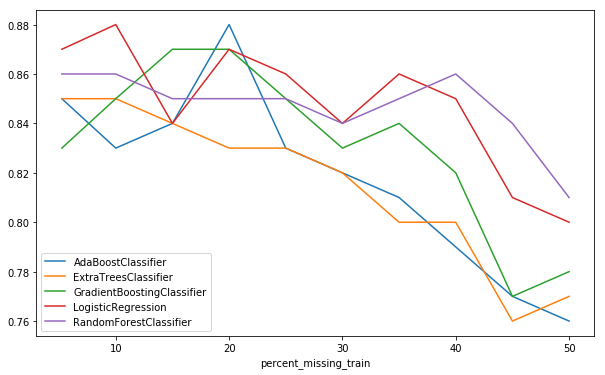

In [399]:
grouped_df = experiment_df.drop(['num_row_missing_train', 'accuracy',  'precision', 'recall', 'f1-score'], axis=1).set_index('percent_missing_train')
grouped_df.groupby('classifier_type')['auc'].plot(legend=True, figsize=(10,6))

In [99]:
y = df['target'].apply(lambda x: 1 if x=='+' else 0)
X = df.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify=y)

In [100]:
def missing_data_generator(data, target_pct=None):
    if target_pct == None:
        target_pct = 2*(((data.loc[data.any(axis=1)]==' ').sum(axis=1) + data.isna().sum(axis=1)).mean())/data.shape[1]
        
    data['ctus4'] = data['ctus4'].astype('float64')
    data['ctus6'] = data['ctus6'].astype('float64')
                    
    rows, columns = np.array(data.shape)-1
    column_names = data.columns.tolist()
    # create a list of row index of where there are missing values
    missing_row_index = data.loc[((data==' ').any(axis=1)) | (data.isna().any(axis=1))].index.tolist() 
    
    # generate missing values with a cap on 75% of the data
    while len(missing_row_index) < 0.75*(data.shape[0]):
        row_ind, col_ind = randint(0,rows), randint(0,columns)
        while data.iloc[row_ind].name in missing_row_index:  # not repeat on rows with missing values for now
            row_ind = randint(0,rows)
            
        if data.iloc[:, col_ind].dtypes == 'object':
            data.at[data.iloc[row_ind].name, column_names[col_ind]] = ' '
            missing_row_index.append(data.iloc[row_ind].name)
        else:
            data.at[data.iloc[row_ind].name, column_names[col_ind]] = 'NaN'
            missing_row_index.append(data.iloc[row_ind].name)
            
    rows = len(missing_row_index)-1
    # generate missing values to be roughly about a percentage of the total data
    while ((data.loc[data.any(axis=1)]==' ').sum(axis=1) + data.isna().sum(axis=1)).mean()/data.shape[1] < target_pct:
        row_ind, col_ind = randint(0,rows), randint(0,columns)
        
        if data.iloc[:, col_ind].dtypes == 'object':
            data.at[missing_row_index[row_ind], column_names[col_ind]] = ' '
            
        else:
            data.at[missing_row_index[row_ind], column_names[col_ind]] = 'NaN'
                                
    return data

In [371]:
X_train = missing_data_generator(X_train, target_pct=0.5)
print(X_train.loc[((X_train==' ').any(axis=1)) | X_train.isna().any(axis=1)].shape[0])
((X_train.loc[X_train.any(axis=1)]==' ').sum(axis=1) + X_train.isna().sum(axis=1)).mean()/X_train.shape[1]

/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


414


0.5

In [372]:
X_test = missing_data_generator(X_test, target_pct=0.5)
print(X_test.loc[((X_test==' ').any(axis=1)) | X_test.isna().any(axis=1)].shape[0])
((X_test.loc[X_test.any(axis=1)]==' ').sum(axis=1) + X_test.isna().sum(axis=1)).mean()/X_test.shape[1]

/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/tzulungs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


104


0.5